<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [1]:
# cell1
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
تمام کتابخانه‌های مورد نیاز ایمپورت شده اند که در ادامه در زمان استفاده از هر کدام در مورد آن بحث خواهیم کرد.    </div>
</html>
</body>

## Load and Prepare Data

In [2]:
# cell2
train_df=pd.read_csv('train.csv')
tt=test_df=pd.read_csv('test.csv')

## EDA and Data Preprocessing

In [3]:
# cell3
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
# cell4
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
دیتافریم‌ها لود می‌شوند و نگاهی به تعداد و ستون‌های آن‌ها می‌کنیم.    </div>
</html>
</body>

In [5]:
# cell5
weather=pd.get_dummies(train_df['weather'])
weather=weather.rename(columns={1: 'weather1', 2: 'weather2',3: 'weather3', 4: 'weather4'}) 
train_df=pd.concat([train_df,weather],axis=1)
train_df.drop('weather',inplace=True,axis=1)

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
با توجه به اینکه ستون weather ۴ حالت را به شکل عددی بین ۱ تا ۴ نشان می‌دهد، لازم است تا با دستور get_dummies این ستون را به ۴ ستون جدای ۰و۱ تبدیل کنیم.    </div>
</html>
</body>

In [6]:
# cell6
train_df

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,weather1,weather2,weather3,weather4
0,2011-01-01 00:00:00,1,0,0,9.84,14.395,81,0.0000,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,9.02,13.635,80,0.0000,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,9.02,13.635,80,0.0000,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,9.84,14.395,75,0.0000,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,9.84,14.395,75,0.0000,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,15.58,19.695,50,26.0027,7,329,336,1,0,0,0
10882,2012-12-19 20:00:00,4,0,1,14.76,17.425,57,15.0013,10,231,241,1,0,0,0
10883,2012-12-19 21:00:00,4,0,1,13.94,15.910,61,15.0013,4,164,168,1,0,0,0
10884,2012-12-19 22:00:00,4,0,1,13.94,17.425,61,6.0032,12,117,129,1,0,0,0


In [7]:
# cell7
((train_df['count']-train_df['registered']-train_df['casual'])==0).sum()

10886

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
تنها جهت اطمینان از برابر بودن مجموع ستون‌های registered و casual با ستون count است.
برای دیتافریم تست نیز کاری که در سلول ۵ انجام دادیم را انجام میدهیم.
    </div>
</html>
</body>

In [8]:
# cell8
weather=pd.get_dummies(test_df['weather'])
weather=weather.rename(columns={1: 'weather1', 2: 'weather2',3: 'weather3', 4: 'weather4'}) 
test_df=pd.concat([test_df,weather],axis=1)
test_df.drop('weather',inplace=True,axis=1)

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
برای دیتافریم تست نیز کاری که در سلول ۵ انجام دادیم را انجام میدهیم.
    </div>
</html>
</body>

In [9]:
# cell9
test_df

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,weather1,weather2,weather3,weather4
0,2011-01-20 00:00:00,1,0,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,10.66,12.880,56,11.0014,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,10.66,12.880,60,11.0014,0,1,0,0
6489,2012-12-31 20:00:00,1,0,1,10.66,12.880,60,11.0014,0,1,0,0
6490,2012-12-31 21:00:00,1,0,1,10.66,12.880,60,11.0014,1,0,0,0
6491,2012-12-31 22:00:00,1,0,1,10.66,13.635,56,8.9981,1,0,0,0


In [10]:
# cell10
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  weather1    10886 non-null  uint8  
 12  weather2    10886 non-null  uint8  
 13  weather3    10886 non-null  uint8  
 14  weather4    10886 non-null  uint8  
dtypes: float64(3), int64(7), object(1), uint8(4)
memory usage: 978.2+ KB


In [11]:
# cell11
type(train_df.datetime[0])

str

In [12]:
# cell12
def str_to_epoch(row):
    return int(time.mktime(time.strptime(row,'%Y-%m-%d %H:%M:%S')))
def str_to_hour(row):
    return int(time.strptime(row,'%Y-%m-%d %H:%M:%S').tm_hour)
def str_to_wday(row):
    return int(time.strptime(row,'%Y-%m-%d %H:%M:%S').tm_wday)
    
train_df['hour']=train_df.datetime.apply(str_to_hour)
train_df['wday']=train_df.datetime.apply(str_to_wday)
train_df['datetime']=train_df.datetime.apply(str_to_epoch)
train_df

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,weather1,weather2,weather3,weather4,hour,wday
0,1293827400,1,0,0,9.84,14.395,81,0.0000,3,13,16,1,0,0,0,0,5
1,1293831000,1,0,0,9.02,13.635,80,0.0000,8,32,40,1,0,0,0,1,5
2,1293834600,1,0,0,9.02,13.635,80,0.0000,5,27,32,1,0,0,0,2,5
3,1293838200,1,0,0,9.84,14.395,75,0.0000,3,10,13,1,0,0,0,3,5
4,1293841800,1,0,0,9.84,14.395,75,0.0000,0,1,1,1,0,0,0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1355931000,4,0,1,15.58,19.695,50,26.0027,7,329,336,1,0,0,0,19,2
10882,1355934600,4,0,1,14.76,17.425,57,15.0013,10,231,241,1,0,0,0,20,2
10883,1355938200,4,0,1,13.94,15.910,61,15.0013,4,164,168,1,0,0,0,21,2
10884,1355941800,4,0,1,13.94,17.425,61,6.0032,12,117,129,1,0,0,0,22,2


In [13]:
# cell13
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   weather1    6493 non-null   uint8  
 9   weather2    6493 non-null   uint8  
 10  weather3    6493 non-null   uint8  
 11  weather4    6493 non-null   uint8  
dtypes: float64(3), int64(4), object(1), uint8(4)
memory usage: 431.3+ KB


In [14]:
# cell14
test_df['hour']=test_df.datetime.apply(str_to_hour)
test_df['wday']=test_df.datetime.apply(str_to_wday)
test_df['datetime']=test_df.datetime.apply(str_to_epoch)
test_df

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,weather1,weather2,weather3,weather4,hour,wday
0,1295469000,1,0,1,10.66,11.365,56,26.0027,1,0,0,0,0,3
1,1295472600,1,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,3
2,1295476200,1,0,1,10.66,13.635,56,0.0000,1,0,0,0,2,3
3,1295479800,1,0,1,10.66,12.880,56,11.0014,1,0,0,0,3,3
4,1295483400,1,0,1,10.66,12.880,56,11.0014,1,0,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1356967800,1,0,1,10.66,12.880,60,11.0014,0,1,0,0,19,0
6489,1356971400,1,0,1,10.66,12.880,60,11.0014,0,1,0,0,20,0
6490,1356975000,1,0,1,10.66,12.880,60,11.0014,1,0,0,0,21,0
6491,1356978600,1,0,1,10.66,13.635,56,8.9981,1,0,0,0,22,0


In [15]:
# cell15
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  int64  
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  weather1    10886 non-null  uint8  
 12  weather2    10886 non-null  uint8  
 13  weather3    10886 non-null  uint8  
 14  weather4    10886 non-null  uint8  
 15  hour        10886 non-null  int64  
 16  wday        10886 non-null  int64  
dtypes: float64(3), int64(10), uint8(4)
memory usage: 1.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeInd

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در سلول ۱۰ الی ۱۵ با توجه به اینکه تاریخ به شکل رشته است و برای اینکه به عنوان فیچر در نظر گرفته شود می‌تواند به شکل time_epoch آن را به یک عدد تبدیل کنیم. همچنین ساعت و روز هفته را نیز به عنوان فیچر جدید از آن ستون استخراج می‌کنیم زیرا میتواند کمک کننده باشد. همچنین اگر با گذشت زمان علاقه مردم به اجاره دوچرخه بیشتر یا کمتر شده باشد، time_epoch یک فیچر مهم برای ما خواهد بود.    </div>
</html>
</body>

In [16]:
# cell16
print(train_df.isnull().sum())
print(test_df.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
weather1      0
weather2      0
weather3      0
weather4      0
hour          0
wday          0
dtype: int64
datetime      0
season        0
holiday       0
workingday    0
temp          0
atemp         0
humidity      0
windspeed     0
weather1      0
weather2      0
weather3      0
weather4      0
hour          0
wday          0
dtype: int64


## 

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در سلول ۱۶ میفهمیم که هیچ دیتای از دست رفته ای نداریم    </div>
</html>
</body>

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در سلولهای بعدی نمودار کورلیشین نمایش داده میشود که طبق آن hour و temp بیشترین همبستگی را با فیچر‌های registered و casual دارند.    </div>
</html>
</body>

## Strorytelling - Visualization

<AxesSubplot:>

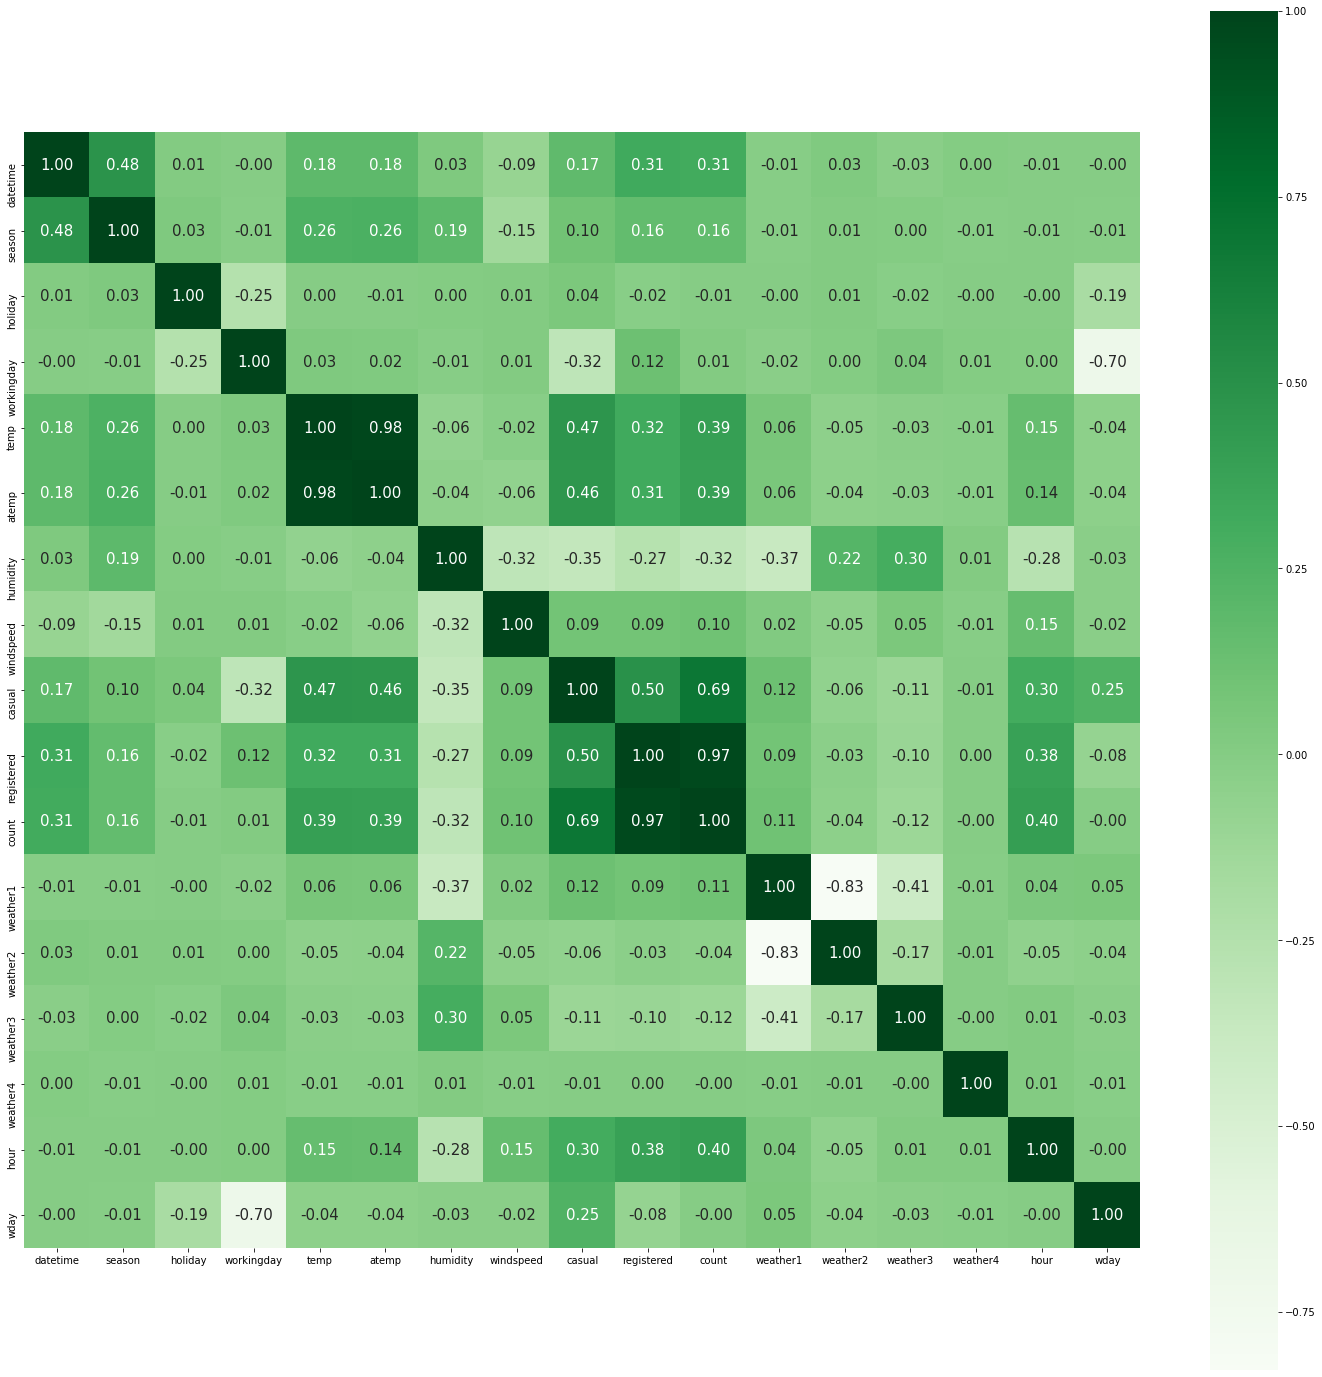

In [17]:
# cell17
corr = train_df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

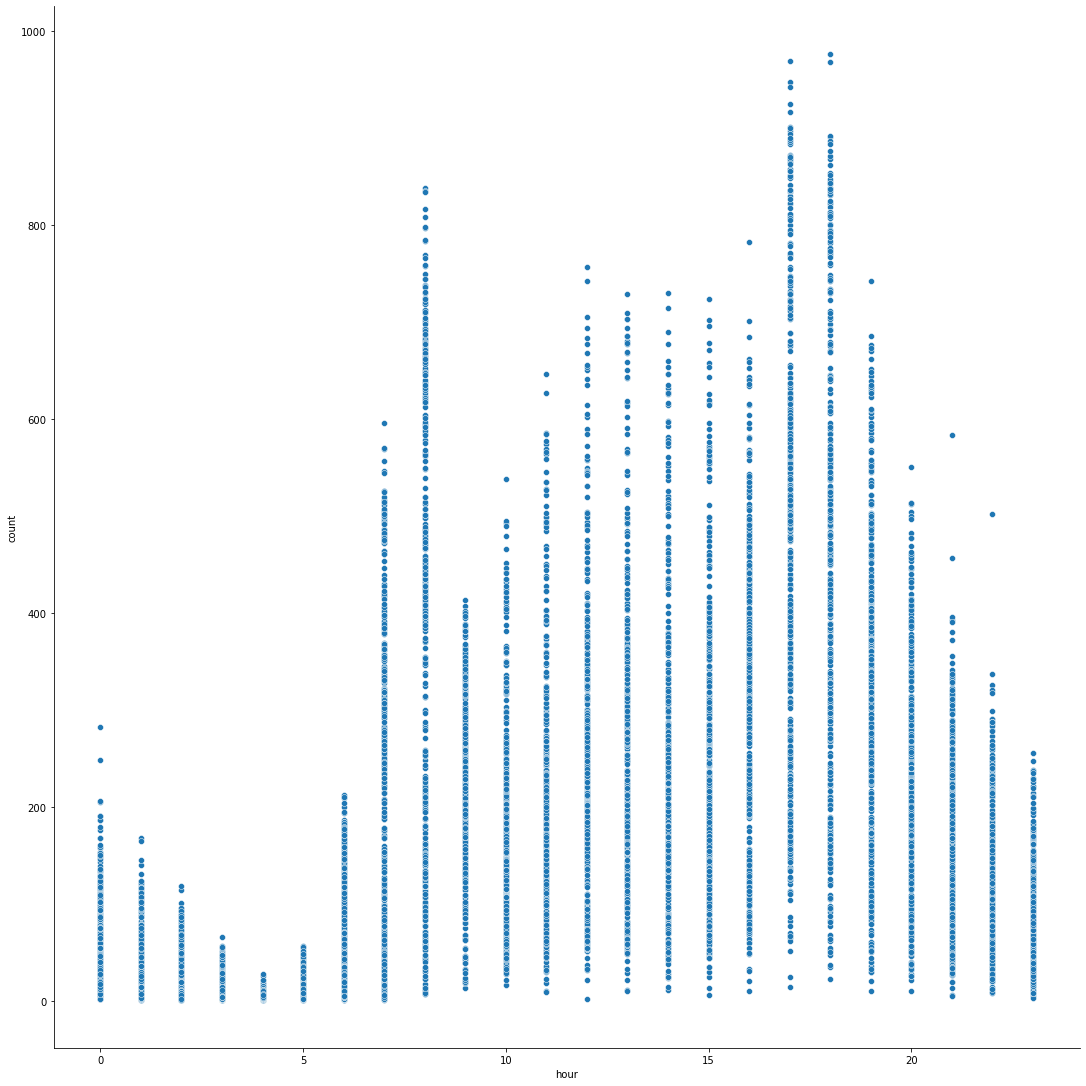

In [18]:
# cell18
sns.relplot(x="hour", y="count", data=train_df,height =15)

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
برای learn شدن مدل‌ها با توجه به اینکه کورلیشن فیچرها با registered و casual متفاوت است، هر دو مقدار را پیش بینی میکنیم  سپس آن دو را با هم جمع میکنیم تا count به دست بیاید.    </div>
</html>
</body>

## Train your model (Regression)

In [19]:
# cell19
y1=train_df['casual']
y2=train_df['registered']
X=train_df.drop(['casual','registered','count'],axis=1)

In [20]:
# cell20
X_train, X_test, y1_train, y1_test = train_test_split(X,y1, test_size = 0.25, random_state = 4)

In [21]:
# cell21
y2_train=y2.loc[y1_train.index]
y2_test=y2.loc[y1_test.index]
y_test=y1_test+y2_test

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در سلول ۱۹ تا ۲۱ train و تست را در دیتافریم train جدا میکنیم. زیرا میخواهیم متریک‌ها را برای هر مدل اندازه بگیریم  سپس روی داده های اصلی خود پیاده کنیم.    </div>
</html>
</body>

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در سلول‌های بعد ابتدا به صورت خطی تک متغیره (با فیچر temp که بیشترین همبستگی را دارد) سپس با مدل multi_linear و سپس با مدل Polynomial درجه ۲ و ۳ پیشبینی میکنیم که با توجه به متریکهای ثبت شده بهترین حالت با مدل multi_linear ثبت شده است.    </div>
</html>
</body>

## Linear

In [22]:
# cell22
X_train_linear=X_train[['temp']]
X_test_linear=X_test[['temp']]


In [23]:
# cell23
linear_m1 = LinearRegression()
linear_m1.fit(X_train_linear, y1_train)
linear_m2 = LinearRegression()
linear_m2.fit(X_train_linear, y2_train)


LinearRegression()

In [24]:
# cell24
y1_pred_linear = linear_m1.predict(X_test_linear)
y2_pred_linear = linear_m2.predict(X_test_linear)
y_pred_linear=y1_pred_linear+y2_pred_linear

In [25]:
# cell25
print('R^2:',metrics.r2_score(y_test, y_pred_linear))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_linear))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_linear))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))

R^2: 0.16390880025971655
MAE: 127.48175617886591
MSE: 28098.411770293318
RMSE: 167.62580878341294


## multi Linear

In [26]:
# cell26
X_train_multi_linear=X_train
X_test_multi_linear=X_test

In [27]:
# cell27
multi_linear_m1 = LinearRegression()
multi_linear_m1.fit(X_train, y1_train)
multi_linear_m2 = LinearRegression()
multi_linear_m2.fit(X_train, y2_train)

LinearRegression()

In [28]:
# cell28
y1_pred_multi_linear = multi_linear_m1.predict(X_test_multi_linear)
y2_pred_multi_linear = multi_linear_m2.predict(X_test_multi_linear)
y_pred_multi_linear=y1_pred_multi_linear+y2_pred_multi_linear

In [29]:
# cell29
print('R^2:',metrics.r2_score(y_test, y_pred_multi_linear))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_multi_linear))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_multi_linear))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_multi_linear)))

R^2: 0.40995008689286994
MAE: 105.2855114249098
MSE: 19829.73320214355
RMSE: 140.81808549381557


## Polynomial (2)

In [30]:
# cell30
poly_features = PolynomialFeatures(degree=2)
X_train_quadratic = poly_features.fit_transform(X_train)
X_test_quadratic = poly_features.fit_transform(X_test)

quadratic1 = LinearRegression()
quadratic1.fit(X_train_quadratic, y1_train)
 
quadratic2 = LinearRegression()
quadratic2.fit(X_train_quadratic, y2_train)

y1_test_predicted = quadratic1.predict(X_test_quadratic)
y2_test_predicted = quadratic2.predict(X_test_quadratic)

y_poly_predict = y1_test_predicted+y2_test_predicted


In [31]:
# cell31
print('R^2:',metrics.r2_score(y_test, y_poly_predict))
print('MAE:',metrics.mean_absolute_error(y_test, y_poly_predict))
print('MSE:',metrics.mean_squared_error(y_test, y_poly_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_poly_predict)))

R^2: 0.3910074313547546
MAE: 108.07292719926258
MSE: 20466.336643847193
RMSE: 143.06060479337836


## Polynomial (3)

In [32]:
# cell32
poly_features_3 = PolynomialFeatures(degree=3)
X_train_quadratic_3 = poly_features_3.fit_transform(X_train)
X_test_quadratic_3 = poly_features_3.fit_transform(X_test)

quadratic1_3 = LinearRegression()
quadratic1_3.fit(X_train_quadratic_3, y1_train)
 
quadratic2_3 = LinearRegression()
quadratic2_3.fit(X_train_quadratic_3, y2_train)

y1_test_predicted_3 = quadratic1_3.predict(X_test_quadratic_3)
y2_test_predicted_3 = quadratic2_3.predict(X_test_quadratic_3)

y_poly_predict_3 = y1_test_predicted_3+y2_test_predicted_3


In [33]:
# cell33
print('R^2:',metrics.r2_score(y_test, y_poly_predict_3))
print('MAE:',metrics.mean_absolute_error(y_test, y_poly_predict_3))
print('MSE:',metrics.mean_squared_error(y_test, y_poly_predict_3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_poly_predict_3)))

R^2: 0.19462525174845313
MAE: 130.44366157950927
MSE: 27066.127849208082
RMSE: 164.51786483299642


## Test Result

In [34]:
# cell34
X_result=test_df

In [35]:
# cell35

y1_result = multi_linear_m1.predict(X_result)
y2_result = multi_linear_m2.predict(X_result)


y_poly_predict = y1_result+y2_result


In [37]:
# cell36
result=pd.DataFrame({'datetime':tt['datetime'],'count':y_poly_predict})
result['count']=result['count'].where(result['count']>0,other=0)
result.to_csv('result.csv',index=False)

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در نهایت داده‌ی تست را با مدل multi_linear پیشبینی میکنیم و داده‌های خروجی منفی را صفر در نظر میگیریم و به صورت فایل csv ذخیره میکنیم.    </div>
</html>
</body>